In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('regression_train.csv')

In [3]:
train.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051


In [4]:
train.count()

data1     10000
data2     10000
data3     10000
data4     10000
data5      9999
data6      9997
data7      9998
data8      9999
data9      9999
data10     9999
output     9999
dtype: int64

In [5]:
train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     1
data6     3
data7     2
data8     1
data9     1
data10    1
output    1
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [7]:
train.describe()

,data1,data2,data4,data5,data6,data7,data8,output
count,10000.000000,10000.000000,10000.000000,9999.000000,9997.000000,9998.000000,9999.000000,9999.000000
mean,4.500200,199.937000,19.980069,1999.994099,0.499850,5.032647,0.989699,67.641293
std,3.468602,57.637745,5.790647,575.293177,0.500025,2.882390,0.812112,13.373996
min,0.000000,100.000000,0.000000,4.000000,0.000000,0.001195,0.000000,30.857090
25%,2.000000,149.000000,14.928790,1505.000000,0.000000,2.541841,0.000000,57.393568
50%,4.000000,201.000000,20.000361,1999.000000,0.000000,5.008526,1.000000,67.877814
75%,7.000000,250.000000,24.979557,2490.000000,1.000000,7.520097,2.000000,77.831703
max,200.000000,299.000000,70.002000,2999.000000,1.000000,9.999848,2.000000,103.809450


In [8]:
train.drop('data9',axis =1,inplace = True)
train.drop('data10',axis =1,inplace = True)
train.head()

,data1,data2,data3,data4,data5,data6,data7,data8,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,64.925051


In [9]:
train.dropna(subset = ['output'], inplace=True)

In [10]:
print(train.iloc[40:49,:])

    data1  data2 data3      data4   data5  data6     data7  data8     output
40      0    128     E  29.546179  2181.0    NaN       NaN    2.0  57.219083
41      9    250     D  29.807073  2242.0    1.0  4.550351    1.0  90.376716
42      7    288     B  14.710382  1321.0    1.0  8.759263    1.0  86.598606
43      2    219     A  25.589476  1539.0    NaN  7.085797    2.0  75.916325
44      1    282     B  25.128643  1996.0    1.0  2.967270    1.0  82.983048
45      3    172     A  28.146361  2262.0    1.0  9.871408    0.0  72.603133
46      0    221     G  23.039861     4.0    1.0  6.177243    2.0  71.113118
47      9    150     C  11.326121  2473.0    1.0  6.028054    2.0  55.221563
48      9    102     G  28.339880  1955.0    1.0  2.846756    1.0  57.752648


In [11]:
train['data6'].fillna(method='ffill',inplace=True)
print(train.iloc[40:49,:])

    data1  data2 data3      data4   data5  data6     data7  data8     output
40      0    128     E  29.546179  2181.0    1.0       NaN    2.0  57.219083
41      9    250     D  29.807073  2242.0    1.0  4.550351    1.0  90.376716
42      7    288     B  14.710382  1321.0    1.0  8.759263    1.0  86.598606
43      2    219     A  25.589476  1539.0    1.0  7.085797    2.0  75.916325
44      1    282     B  25.128643  1996.0    1.0  2.967270    1.0  82.983048
45      3    172     A  28.146361  2262.0    1.0  9.871408    0.0  72.603133
46      0    221     G  23.039861     4.0    1.0  6.177243    2.0  71.113118
47      9    150     C  11.326121  2473.0    1.0  6.028054    2.0  55.221563
48      9    102     G  28.339880  1955.0    1.0  2.846756    1.0  57.752648


In [13]:
train=train.fillna(train.mean())
print(train.iloc[40:49,:])

    data1  data2 data3      data4   data5  data6     data7  data8     output
40      0    128     E  29.546179  2181.0    1.0  5.032647    2.0  57.219083
41      9    250     D  29.807073  2242.0    1.0  4.550351    1.0  90.376716
42      7    288     B  14.710382  1321.0    1.0  8.759263    1.0  86.598606
43      2    219     A  25.589476  1539.0    1.0  7.085797    2.0  75.916325
44      1    282     B  25.128643  1996.0    1.0  2.967270    1.0  82.983048
45      3    172     A  28.146361  2262.0    1.0  9.871408    0.0  72.603133
46      0    221     G  23.039861     4.0    1.0  6.177243    2.0  71.113118
47      9    150     C  11.326121  2473.0    1.0  6.028054    2.0  55.221563
48      9    102     G  28.339880  1955.0    1.0  2.846756    1.0  57.752648


In [14]:
train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
output    0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

train['data3']=labelencoder.fit_transform(train['data3'])
train.head()




,data1,data2,data3,data4,data5,data6,data7,data8,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,0.0,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,0.0,64.925051


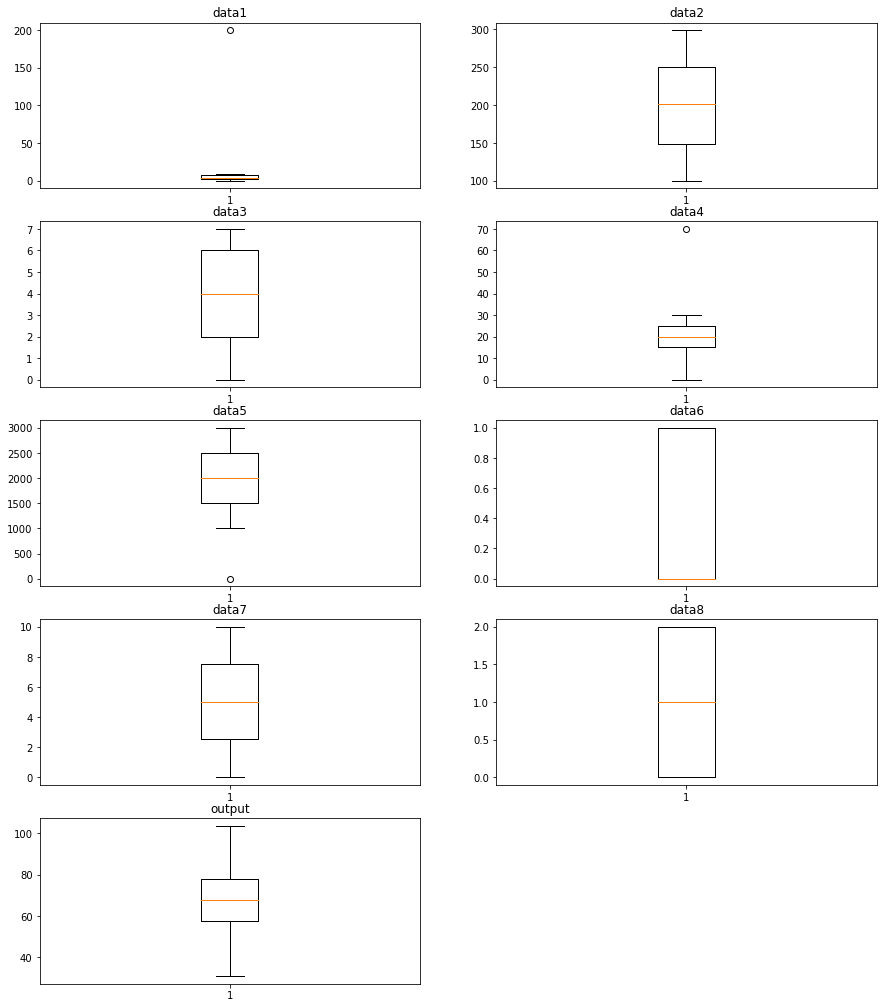

In [17]:
#checking for outliers
plt.figure(figsize = (15,25))
count = 1
for col in train:
    plt.subplot(7,2,count)
    plt.boxplot(train[col])
    plt.title(col)
    count +=1
        
plt.show()

In [18]:
train.shape

(9999, 9)

In [20]:
#seperating X and y
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values


In [28]:
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)
X

array([[ 1.00894945,  1.37168621, -0.66190154, ...,  1.00010002,
         1.48164814,  0.01268488],
       [-1.00932431, -1.595202  ,  1.52064479, ...,  1.00010002,
         0.75898884, -1.21873404],
       [ 1.00894945,  1.00733152, -1.53492007, ...,  1.00010002,
         1.28190029,  0.01268488],
       ...,
       [ 0.4322998 , -0.20718412, -0.22539227, ..., -0.99989999,
        -0.74689526, -1.21873404],
       [-1.00932431, -1.17879663,  1.52064479, ..., -0.99989999,
         0.67677854,  1.2441038 ],
       [ 0.14397498,  1.11143286, -1.53492007, ..., -0.99989999,
         1.12537783,  1.2441038 ]])

In [29]:
#dividing into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
MLR = LinearRegression()

In [32]:
MLR.fit(X_train,y_train)

LinearRegression()

In [53]:
#prediction
y_pred = MLR.predict(X_test)
print(MLR.coef_)
print(MLR.intercept_)

[ 2.05878907e+00  1.15512866e+01  4.93939908e-02  5.12503801e+00
 -8.48744824e-03 -1.90497733e-01  2.90526239e+00  8.34720787e-03]
67.61644798401834


In [56]:
prediction_output =pd.DataFrame(data=[y_test,y_pred],index=['y_test','y_pred'])
prediction_output.transpose()

,y_test,y_pred
0,42.284988,43.922142
1,65.556045,64.169853
2,44.297092,45.808369
3,62.890713,60.967010
4,80.468042,79.896002
...,...,...
2995,63.401610,63.495156
2996,84.104356,82.133712
2997,53.462491,51.571885
2998,91.602944,91.589013


In [68]:
test=pd.read_csv('regression_test.csv')
test.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p


In [69]:
test.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
dtype: int64

In [70]:
test.count()

data1     10000
data2     10000
data3     10000
data4     10000
data5     10000
data6     10000
data7     10000
data8     10000
data9     10000
data10    10000
dtype: int64

In [71]:
test['data3']=labelencoder.fit_transform(test['data3'])

In [76]:

test.drop('data9',axis =1,inplace = True)
test.drop('data10',axis =1,inplace = True)
test.head()

,data1,data2,data3,data4,data5,data6,data7,data8
0,7,195,0,29.038043,2725,1,6.145731,2
1,9,109,5,20.221431,1184,1,9.334184,2
2,0,126,2,26.477532,2975,1,9.021806,1
3,2,209,4,13.445450,1067,1,1.814993,0
4,5,268,1,25.065894,1336,1,1.639130,1


In [79]:
Testing = test.iloc[:].values

In [78]:
Testing_Output = MLR.predict(Testing)
print(Testing_Output)

[2477.90280111 1466.01367708 1659.65411531 ... 2146.67514793 3590.97039063
 3434.96944092]


In [80]:
Final_Output=pd.read_csv('regression_test.csv')
Final_Output["Output"] = Testing_Output
Final_Output.head()


,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,Output
0,7,195,A,29.038043,2725,1,6.145731,2,M,p,2477.902801
1,9,109,F,20.221431,1184,1,9.334184,2,M,p,1466.013677
2,0,126,C,26.477532,2975,1,9.021806,1,M,p,1659.654115
3,2,209,E,13.445450,1067,1,1.814993,0,M,p,2551.085378
4,5,268,B,25.065894,1336,1,1.639130,1,M,p,3295.408986


In [81]:
Final_Output.to_csv('regression_test_output.csv')

In [82]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred) 

1.5092727222826319